In [201]:
!pip install osmnx

  Using cached https://files.pythonhosted.org/packages/ce/63/74c0b6184b6b169b121bb72458818ee60a7d7c436d7b1907bd5874188c55/matplotlib-3.4.1-cp37-cp37m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/matplotlib-3.4.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [202]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Uninstalling matplotlib-3.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.1
  Using cached https://files.pythonhosted.org/packages/4c/9b/35ab3469fd1509f7636a344940569ebfd33239673fd2318e80b4700a257c/matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl
ERROR: osmnx 1.0.1 has requirement matplotlib>=3.3, but you'll have matplotlib 3.1.3 which is incompatible.
ERROR: albumentation

/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/matplotlib-3.1.3.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


In [585]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()  # for plot styling
from sklearn.cluster import KMeans
import numpy as np
import shapely
import math
import networkx as nx
import scipy

In [586]:
gdf = ox.geometries_from_bbox(48.7348, 48.7034, 2.1344, 2.2355, tags= {'building': True} )

type(gdf)

geopandas.geodataframe.GeoDataFrame

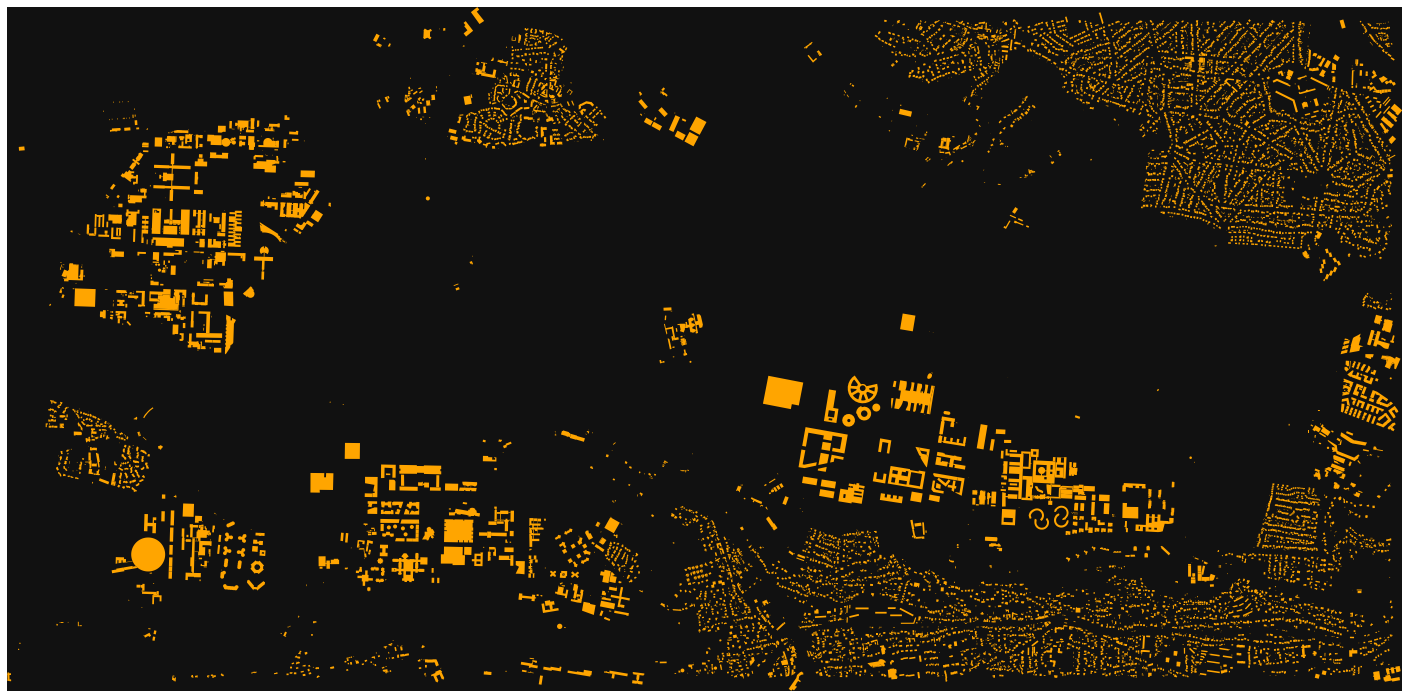

In [639]:
fig, ax = ox.plot_footprints(gdf, figsize=(25, 15))

In [588]:
gdf.geometry

0                                 POINT (2.19093 48.70468)
1                                 POINT (2.19104 48.70462)
2        POLYGON ((2.14665 48.71133, 2.14690 48.71132, ...
3        POLYGON ((2.14473 48.71116, 2.14485 48.71115, ...
4        POLYGON ((2.14596 48.71129, 2.14621 48.71129, ...
                               ...                        
12175    POLYGON ((2.21763 48.71053, 2.21744 48.71054, ...
12176    POLYGON ((2.13877 48.71607, 2.13879 48.71609, ...
12177    POLYGON ((2.21101 48.71291, 2.21107 48.71364, ...
12178    POLYGON ((2.20859 48.71188, 2.20859 48.71195, ...
12179    POLYGON ((2.20929 48.71391, 2.20925 48.71391, ...
Name: geometry, Length: 12180, dtype: geometry

In [589]:
df = pd.DataFrame(gdf.geometry)
df.head()

,geometry
0,POINT (2.19093 48.70468)
1,POINT (2.19104 48.70462)
2,"POLYGON ((2.14665 48.71133, 2.14690 48.71132, ..."
3,"POLYGON ((2.14473 48.71116, 2.14485 48.71115, ..."
4,"POLYGON ((2.14596 48.71129, 2.14621 48.71129, ..."


In [590]:
df['area'] = gdf.geometry.area
df['centroid_x'] = gdf.geometry.centroid.x
df['centroid_y'] = gdf.geometry.centroid.y
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


,geometry,area,centroid_x,centroid_y
0,POINT (2.19093 48.70468),0.000000e+00,2.190934,48.704683
1,POINT (2.19104 48.70462),0.000000e+00,2.191036,48.704624
2,"POLYGON ((2.14665 48.71133, 2.14690 48.71132, ...",1.812241e-07,2.146757,48.710967
3,"POLYGON ((2.14473 48.71116, 2.14485 48.71115, ...",4.383000e-07,2.145109,48.710672
4,"POLYGON ((2.14596 48.71129, 2.14621 48.71129, ...",1.198402e-07,2.146078,48.711047


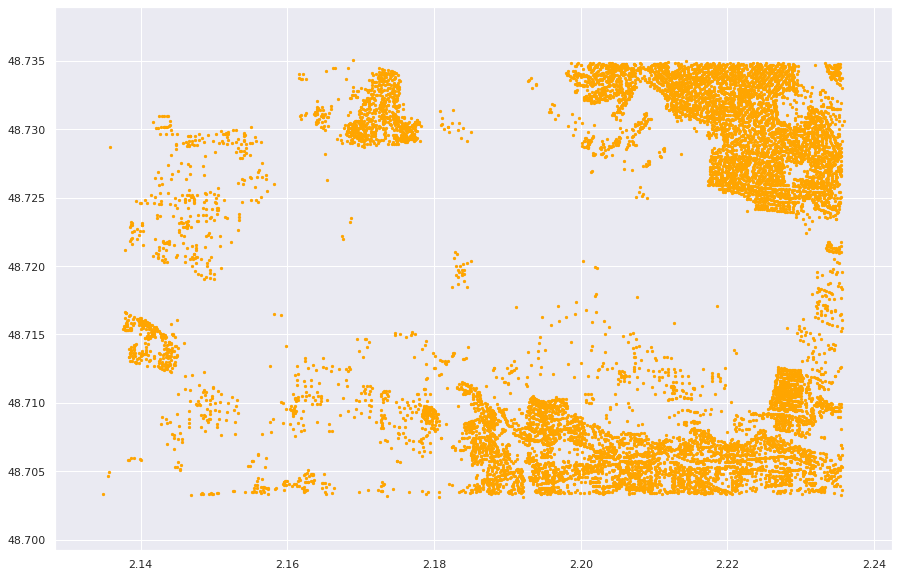

In [591]:
plt.figure(figsize=(15, 10))
plt.scatter(x=df['centroid_x'], y=df['centroid_y'], s=5, cmap='viridis',c='orange')

In [592]:
def default_k(lat1, lat2, long1, long2):
  S =  math.pi/ 180 * (6400 ** 2) * abs(math.sin(lat1) - math.sin(lat2)) * abs(long1 - long2)
  b = sum(gdf['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**6))
  
  return int(S * ((b/S) ** (1/4)))

In [593]:
k = default_k(48.7348, 48.7034, 2.1344, 2.2355)
X = df[['centroid_x', 'centroid_y']]
kmeans = KMeans(n_clusters=k)
groups = kmeans.fit_predict(X=X, sample_weight=df['area'])

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


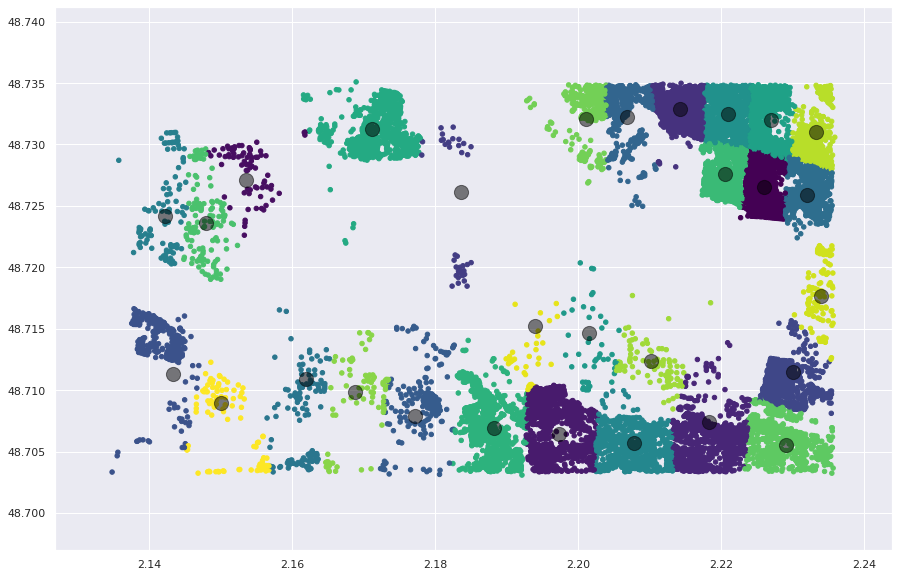

In [594]:
plt.figure(figsize=(15, 10))
plt.scatter(X['centroid_x'], X['centroid_y'], c=groups, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [595]:
# Load the graph

graph = ox.graph_from_bbox(48.7348, 48.7034, 2.1344, 2.2355, network_type='drive_service')

type(graph)

graph2 = graph.copy()

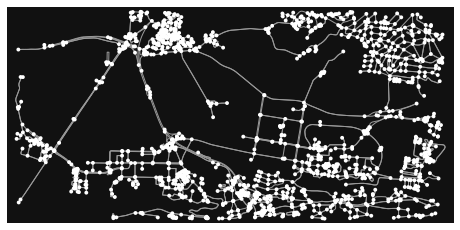

In [596]:
fig, ax = ox.plot_graph(graph)

In [597]:
projections = []
for center in centers:
  u, v, key, line = ox.distance.get_nearest_edge(graph, [center[1], center[0]], return_geom=True, return_dist=False)
  print(center, u, v, line)
  min_dist = np.inf
  best = []
  for i in range(len(line.coords)):
    dist = np.linalg.norm(center - line.coords[i])
    if min_dist > dist:
      best = line.coords[i]
      min_dist = dist
  projections.append(best)

projections = np.array(projections)

# print(projections)

[ 2.22600418 48.72651012] 198859755 198860193 LINESTRING (2.2258434 48.7258355, 2.2259383 48.7268747)
[ 2.15354559 48.72707179] 253851700 4156424080 LINESTRING (2.1559686 48.7243549, 2.1565366 48.7241696, 2.1566247 48.7241405)
[ 2.19734657 48.70646111] 511980095 511980102 LINESTRING (2.1959864 48.7062697, 2.1963076 48.7063206, 2.1963734 48.7063519, 2.1963906 48.7063921, 2.1963915 48.706611, 2.1964262 48.7066562, 2.1964718 48.7066819, 2.1965384 48.7066918, 2.1975046 48.7066903, 2.1976044 48.7066676, 2.1978542 48.7065136, 2.1978909 48.7065003, 2.1987989 48.7064908, 2.1988548 48.7065002)
[ 2.21836481 48.70742008] 632660774 1617136427 LINESTRING (2.2178418 48.705678, 2.217852 48.7057521, 2.218017 48.7068491, 2.2180064 48.7068934, 2.2179624 48.7069394, 2.217866 48.7069714, 2.2175813 48.706978)
[ 2.21425417 48.73289536] 139173971 139173967 LINESTRING (2.2152766 48.7330379, 2.2133507 48.7322915)
[ 2.18370075 48.72611289] 244348841 6284631657 LINESTRING (2.1790524 48.7287936, 2.1798615 48.7285

In [598]:
def default_k(lat1, lat2, long1, long2, gdf):
  S =  math.pi/ 180 * (6400 ** 2) * abs(math.sin(lat1) - math.sin(lat2)) * abs(long1 - long2)
  b = sum(gdf['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**6))
  
  return int(S * ((b/S) ** (1/6)))

def get_projections(centers, graph):
  projections = []
  edges_ = ox.distance.get_nearest_edges(graph, centers[:, 0], centers[:, 1], method='kdtree')
  res = [(graph.nodes[edge[0]]['x'], graph.nodes[edge[0]]['y']) for edge in edges_]
  return res

def getStops(lat1, lat2, long1, long2):
  gdf = ox.geometries_from_bbox(lat1, lat2, long1, long2, tags= {'building': True} )
  type(gdf)

  df = pd.DataFrame(gdf.geometry)
  df['area'] = gdf.geometry.area
  df['centroid_x'] = gdf.geometry.centroid.x
  df['centroid_y'] = gdf.geometry.centroid.y
  df[df.area == df.area.max()].geometry

  k = default_k(lat1, lat2, long1, long2, gdf)
  X = df[['centroid_x', 'centroid_y']]

  kmeans = KMeans(n_clusters=k)

  groups = kmeans.fit_predict(X=X, sample_weight=df['area'])

  centers = kmeans.cluster_centers_

  graph = ox.graph_from_bbox(lat1, lat2, long1, long2, network_type='drive_service', simplify=False)

  projections = get_projections(centers, graph)

  return projections

projections = getStops(48.7348, 48.7034, 2.1344, 2.2355)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://py

# Spanning tree

In [640]:
projections = np.array(projections)
print(projections)

[[ 2.1411745 48.7146212]
 [ 2.2167371 48.7101604]
 [ 2.2225636 48.7322962]
 [ 2.187248  48.7071728]
 [ 2.1839057 48.7270979]
 [ 2.2006534 48.7329771]
 [ 2.2328045 48.72553  ]
 [ 2.1959956 48.7067558]
 [ 2.1648221 48.7106666]
 [ 2.22166   48.7059851]
 [ 2.2178061 48.7322167]
 [ 2.1432652 48.7291975]
 [ 2.2342083 48.7309415]
 [ 2.1528389 48.7307022]
 [ 2.2125214 48.7049082]
 [ 2.2258434 48.7258355]
 [ 2.1939061 48.7153704]
 [ 2.2125258 48.7331175]
 [ 2.1716849 48.709648 ]
 [ 2.2205272 48.7273883]
 [ 2.1670665 48.7316179]
 [ 2.2314128 48.7050423]
 [ 2.2059635 48.7321273]
 [ 2.2317089 48.7128135]
 [ 2.2284524 48.7299075]
 [ 2.203882  48.7056316]
 [ 2.152039  48.7196631]
 [ 2.1548733 48.7103316]
 [ 2.1736864 48.7311844]
 [ 2.1777893 48.7068032]
 [ 2.2288036 48.7326358]
 [ 2.2279048 48.709285 ]
 [ 2.2095202 48.712504 ]
 [ 2.1439099 48.7115515]
 [ 2.234393  48.7179699]
 [ 2.2007149 48.7147178]]


In [641]:
nearest_indexes = ox.distance.get_nearest_nodes(graph, projections[:, 0], projections[:, 1], method='kdtree')

In [642]:
nearest_indexes.sort()
nearest_indexes = list(np.unique(nearest_indexes))
print(nearest_indexes)

[137281467, 139178577, 139181601, 139192108, 139237003, 141444963, 198836127, 198859755, 218318408, 288842824, 330586161, 439216913, 528690682, 534303237, 632660791, 1275549210, 1335920434, 1345265714, 1457369123, 1476546447, 1476570970, 1476633011, 1544070580, 1591742543, 1647569641, 1722770323, 2083545147, 3684717106, 4471361273, 4471937792, 4690794731, 6721030935, 6873144567, 7171778594, 8196686309, 8382211700]


In [643]:
def get_node_coord(graph, index):
  return np.array([graph.nodes[index]['x'], graph.nodes[index]['y']])

In [644]:
MAX_N_NEIGHBOURS = 10

edges = {}
for idx1 in nearest_indexes:
  edges[idx1] = {}
  for idx2 in nearest_indexes:
    edges[idx1][idx2] = (np.inf, [])

for i in range(len(nearest_indexes) - 1):
  distances = [
    (np.linalg.norm(
        get_node_coord(graph, nearest_indexes[i]) - get_node_coord(graph, nearest_indexes[j])
    ),
    j)
    for j in range(i + 1, len(nearest_indexes))
  ]
  distances.sort()
  distances = distances[:MAX_N_NEIGHBOURS]
  for (_, j) in distances:
    try:
      nodes = ox.distance.shortest_path(graph, nearest_indexes[i], nearest_indexes[j])
      cost = 0
      for k in range(len(nodes) - 1):
        cost += graph.edges[nodes[k], nodes[k+1], 0]['length']
      edges[nearest_indexes[i]][nearest_indexes[j]] = (cost, nodes)
      edges[nearest_indexes[j]][nearest_indexes[i]] = (cost, nodes)
      print(i, j, cost)
    except nx.NetworkXNoPath:
      edges[nearest_indexes[i]][nearest_indexes[j]] = (np.inf, [])
      edges[nearest_indexes[j]][nearest_indexes[i]] = (np.inf, [])
      print(i, j, np.inf)

# print(edges)


0 9 372.72400000000005
0 18 427.7699999999999
0 1 489.313
0 7 1069.3609999999999
0 6 1080.849
0 4 1088.7259999999999
0 2 843.693
0 34 3139.8739999999993
0 3 1630.9039999999995
0 30 4818.984
1 2 354.38
1 4 850.067
1 9 907.3149999999999
1 7 1311.736
1 3 1141.591
1 18 1187.3629999999998
1 6 1840.4419999999998
1 12 3645.4500000000003
1 34 3161.140999999999
1 30 4840.251000000001
2 3 787.211
2 4 701.1469999999999
2 7 1162.816
2 9 1078.588
2 12 3291.07
2 18 1407.0839999999998
2 6 1697.7420000000002
2 5 2610.9630000000006
2 10 4414.689000000001
2 34 3012.220999999999
3 12 3539.2719999999995
3 4 1453.713
3 5 2859.165
3 7 1915.382
3 9 1831.154
3 10 5167.255000000001
3 18 2159.6499999999996
3 27 4635.128000000001
3 6 2450.308
3 26 4350.228000000001
4 7 461.66900000000004
4 9 774.042
4 6 996.595
4 18 1352.2440000000001
4 12 3992.5129999999995
4 34 2311.0739999999996
4 26 2896.5150000000003
4 30 3990.184000000002
4 10 3713.5420000000013
4 22 3296.3010000000004
5 12 680.1069999999999
5 33 1798.611


In [645]:
csgraph = [
  [edges[nearest_indexes[i]][nearest_indexes[j]][0] for i in range(len(nearest_indexes))] for j in range(len(nearest_indexes)) 
]
# print(csgraph)

span_tree = scipy.sparse.csgraph.minimum_spanning_tree(csgraph)

span_tree2 = span_tree.copy()
# print(span_tree)

In [646]:
span_tree = span_tree.toarray()

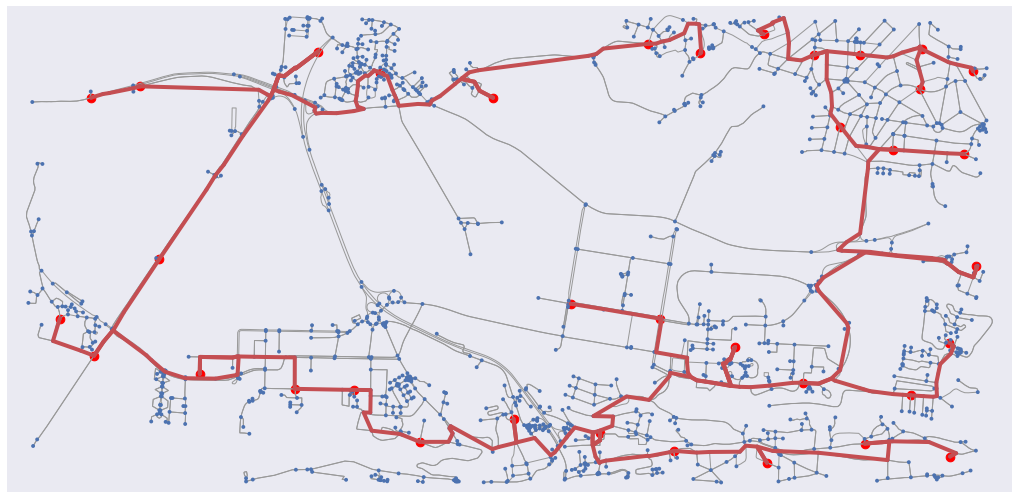

(<Figure size 1296x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa9172666d0>)

In [647]:
fig, ax = plt.subplots(1,1, figsize=(18,10))
ax.scatter([graph.nodes[data]['x'] for data in nearest_indexes], [graph.nodes[data]['y'] for data in nearest_indexes], c='red', s=75, alpha=1)

cnt = 0
new_nodes = []
new_edges = {}

for i in range(len(nearest_indexes)):
  for j in range(len(nearest_indexes)):
    if span_tree[i, j] != 0:
      cnt += 1
      X, Y = [], []
      for id in edges[nearest_indexes[i]][nearest_indexes[j]][1]:
        X.append(graph.nodes[id]['x'])
        Y.append(graph.nodes[id]['y'])
        new_nodes.append(id)
      for k in range(len(edges[nearest_indexes[i]][nearest_indexes[j]][1]) - 1):
        idx1 = edges[nearest_indexes[i]][nearest_indexes[j]][1][k]
        idx2 = edges[nearest_indexes[i]][nearest_indexes[j]][1][k+1]
        if idx1 not in new_edges: new_edges[idx1] = {}
        if idx2 not in new_edges: new_edges[idx2] = {}
        new_edges[idx1][idx2] = graph.edges[idx1, idx2, 0]['length']
        new_edges[idx2][idx1] = graph.edges[idx1, idx2, 0]['length']
      ax.plot(X, Y, 'r-', linewidth=4)

ox.plot_graph(graph, ax=ax, node_color='b')

In [648]:
new_nodes.sort()
new_nodes = np.unique(new_nodes)

In [649]:
MIN_LEAVE_DISTANCE = 500

for node in new_nodes:
  if len(new_edges[node]) == 1:
    node_tmp = node
    visit = {
        node: True
    }
    cost = 0
    l = []
    while len(new_edges[node_tmp]) <= 2:
      for p in new_edges[node_tmp]:
        if p not in visit:
          visit[p] = True
          cost += new_edges[node_tmp][p]
          l.append((node_tmp, p))
          node_tmp = p
          break
    print('leave', node, cost)
    if cost <= MIN_LEAVE_DISTANCE:
      print('here', node)
      for (u, v) in l:
        new_edges[u].pop(v)
        new_edges[v].pop(u)
      nearest_indexes.append(node_tmp)

for node in new_edges:
  if len(new_edges[node]) == 0 and node in nearest_indexes:
        nearest_indexes.remove(node)

while True:
  found = False
  for node in new_nodes:
    if len(new_edges[node]) == 1 and node not in nearest_indexes:
      for p in new_edges[node]:
        new_edges[p].pop(node)
        found = True
      new_edges[node] = {}
  if not found:
    break

nearest_indexes.sort()
nearest_indexes = list(np.unique(nearest_indexes))

leave 139192108 889.9409999999999
leave 198836127 633.6080000000001
leave 218318408 170.25
here 218318408
leave 288842824 336.203
here 288842824
leave 330586161 383.414
here 330586161
leave 439216913 147.57299999999998
here 439216913
leave 528690682 2140.2670000000003
leave 534303237 741.15
leave 632660791 185.251
here 632660791
leave 1335920434 178.63799999999998
here 1335920434
leave 1345265714 1387.893
leave 1457369123 1168.733
leave 1591742543 474.3089999999999
here 1591742543
leave 1647569641 3191.65
leave 4471937792 1335.875
leave 4690794731 1286.904
leave 6721030935 417.55800000000005
here 6721030935
leave 7171778594 338.45099999999996
here 7171778594
leave 8196686309 343.177
here 8196686309


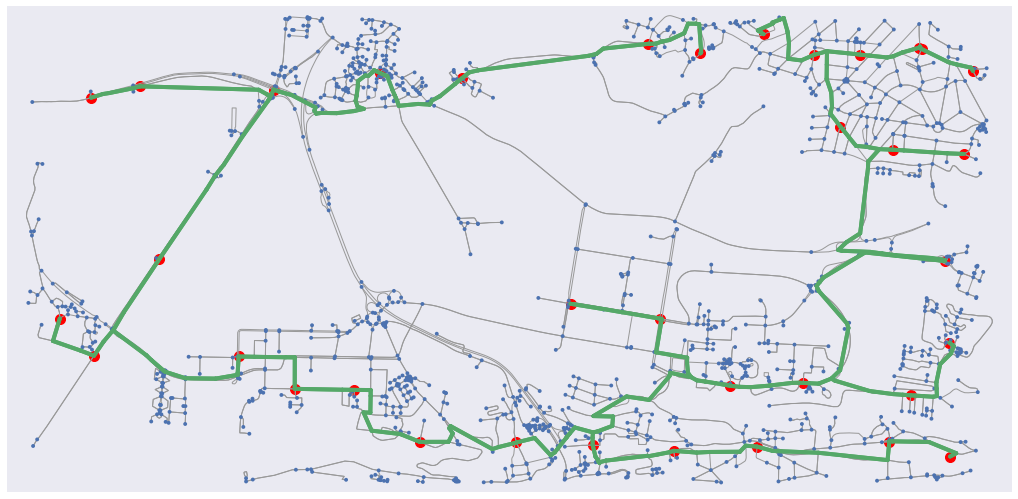

(<Figure size 1296x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa9177366d0>)

In [650]:
fig, ax = plt.subplots(1,1, figsize=(18,10))
ax.scatter([graph.nodes[data]['x'] for data in nearest_indexes], [graph.nodes[data]['y'] for data in nearest_indexes], c='red', s=100, alpha=1)

for idx1 in new_edges:
  for idx2 in new_edges[idx1]:
    coordi = get_node_coord(graph, idx1)
    coordj = get_node_coord(graph, idx2)
    ax.plot([coordi[0], coordj[0]], [coordi[1], coordj[1]], 'g-', linewidth=4)

ox.plot_graph(graph, ax=ax, node_color='b')

# Construct bus routes

Constuct MST Osmnx graph

In [653]:
G = nx.MultiDiGraph()

for idx1 in new_edges:
  for idx2 in new_edges[idx1]:
    try:
      G.add_edge(idx1, idx2, attr=graph.edges[idx1, idx2, 0])
      G.add_edge(idx2, idx1, attr=graph.edges[idx1, idx2, 0])
    except:
      G.add_edge(idx1, idx2, attr=graph.edges[idx2, idx1, 0])
      G.add_edge(idx2, idx1, attr=graph.edges[idx2, idx1, 0])

Iteration: 0, Cost: 63525.869
Iteration: 1, Cost: 44190.90600000001
Iteration: 2, Cost: 41083.391
Iteration: 3, Cost: 39899.33900000001
Iteration: 4, Cost: 55310.46299999999
Iteration: 5, Cost: 36785.994000000006
Iteration: 6, Cost: 56391.79100000001
Iteration: 7, Cost: 51855.60400000002
Iteration: 8, Cost: 53828.46100000001
Iteration: 9, Cost: 58998.850999999995
Iteration: 10, Cost: 27463.814000000006
Iteration: 11, Cost: 27366.026
Iteration: 12, Cost: 43681.728
Iteration: 13, Cost: 39231.03700000001
Iteration: 14, Cost: 47724.376
Iteration: 15, Cost: 63725.05199999998
Iteration: 16, Cost: 39877.90399999999
Iteration: 17, Cost: 51441.592000000004
Iteration: 18, Cost: 54189.793999999994
Iteration: 19, Cost: 61059.391
Iteration: 20, Cost: 49274.117
Iteration: 21, Cost: 62029.34000000001
Iteration: 22, Cost: 35222.11899999999
Iteration: 23, Cost: 46937.33099999999
Iteration: 24, Cost: 52205.880000000005
Iteration: 25, Cost: 34991.556000000004
Iteration: 26, Cost: 41617.808000000005
Itera

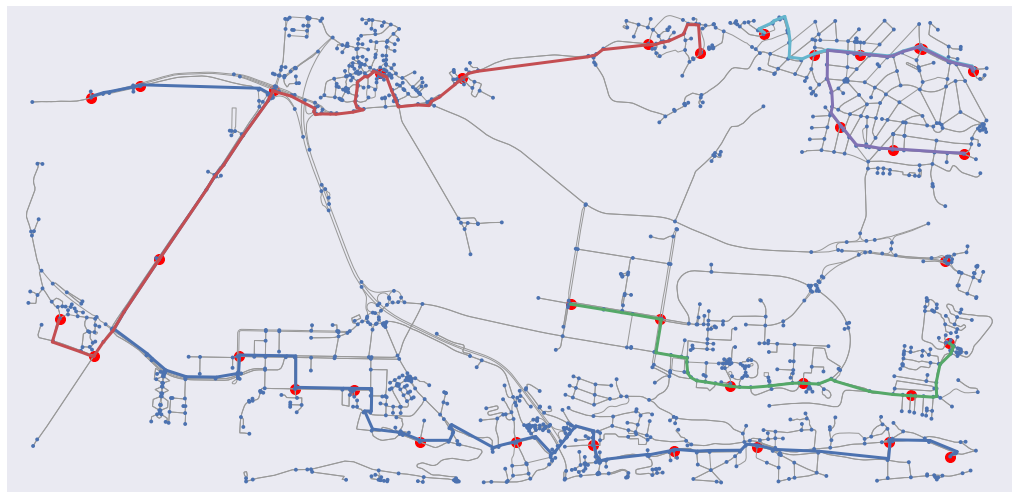

27366.026


In [654]:
import random 

def random_color():
    return np.random.choice(range(256), size=3) / 255


iterations = 10

def cost_path(G, path):
  cost = 0
  for i in range(len(path) - 1):
    try:
      cost += graph.edges[path[i], path[i+1], 0]['length']
    except:
      cost += graph.edges[path[i+1], path[i], 0]['length']
  return cost

def cost_total(G, path_list):
  total_cost = 0
  for path in path_list:
    total_cost += cost_path(G, path)
  return total_cost

def check_fully_connected(G, path_list, nearest_indexes):
  visited = set()
  for path in path_list:
    for node in path:
      if node in nearest_indexes:
        visited.add(node)
  return visited == set(nearest_indexes)

def simulate(nearest_indexes, new_edges, G, leaves, max_iterations=100, tol=20):

  costs, paths = [], []

  for i in range(min(max_iterations, len(leaves) ** 2)):

    path_list = []

    leaves_copy = leaves.copy()

    while len(leaves_copy) > 1:

      u, k = random.sample(leaves_copy, 2)
      leaves_copy.remove(u); leaves_copy.remove(k)
      try:
        path = ox.distance.shortest_path(G, u, k)
        path_list.append(path)
      except:
        break

    if len(leaves_copy) == 1:
      k = leaves_copy.pop()
      try:
        path = ox.distance.shortest_path(G, u, k)
        path_list.append(path)
      except:
        break

    # if check_fully_connected(G, path_list, nearest_indexes):

    cost = cost_total(G, path_list)

    costs.append(cost)
    paths.append(path_list)

    print('Iteration: {}, Cost: {}'.format(i, cost))

  return paths[np.argmin(costs)] if costs else -1


def compute_leaves(nearest_indexes, new_edges):
  leaves = set()
  for node in nearest_indexes:
    if len(new_edges[node]) == 1:
      leaves.add(node)
  return leaves

leaves = compute_leaves(nearest_indexes, new_edges)

path_list = simulate(nearest_indexes, new_edges, G, leaves)

fig, ax = plt.subplots(1,1, figsize=(18,10))
ax.scatter([graph.nodes[data]['x'] for data in nearest_indexes], [graph2.nodes[data]['y'] for data in nearest_indexes], c='red', s=100, alpha=1)

colors = range(len(path_list))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] * 100
j = -1
for path in path_list:
  j += 1
  epsilon = np.random.standard_normal() / 6000
  # epsilon = 0
  color = random_color()
  for i in range(len(path) - 1):
    coordi = get_node_coord(graph, path[i])
    coordj = get_node_coord(graph, path[i+1])

    ax.plot([coordi[0]+epsilon, coordj[0]+epsilon], [coordi[1] + epsilon, coordj[1] + epsilon], c=colors[j], alpha=1, linewidth=3)
    

ox.plot_graph(graph, ax=ax, node_color='b')

print(cost_total(G, path_list))

In [ ]:
def connect(u, k, graph, G, new_edges):
  new_edges[u][k] = -1
  new_edges[k][u] = -1
      
  return G, new_edges

def length_route(u, k, graph):
  try:
    path = ox.distance.shortest_path(graph, u, k)
  except:
    return -1
  return cost_path(graph, path)


def improveMST(nearest_indexes, G, graph, leaves, new_edges, tol=7000):
  for a in range(5):
    leaves_copy = leaves.copy()
    for i in range(int(len(leaves) / 2)):
      u, k = random.sample(leaves_copy, 2)
      leaves_copy.remove(u); leaves_copy.remove(k)
      length = length_route(u, k, graph)
      print(length)
      if length < tol and length != -1:
        G, new_edges = connect(u, k, graph, G, new_edges)
  
  return G, new_edges

G, new_edges = improveMST(nearest_indexes, G, graph, leaves, new_edges, tol=8000)
    

In [ ]:
# fig, ax = plt.subplots(1,1, figsize=(18,10))
# ax.scatter([graph.nodes[data]['x'] for data in nearest_indexes], [graph.nodes[data]['y'] for data in nearest_indexes], c='red', s=100, alpha=1)

# for idx1 in new_edges:
#   for idx2 in new_edges[idx1]:
#     coordi = get_node_coord(G, idx1)
#     coordj = get_node_coord(G, idx2)
#     ax.plot([coordi[0], coordj[0]], [coordi[1], coordj[1]], 'g-', linewidth=4)

# ox.plot_graph(G, ax=ax, node_color='b')

In [652]:
def extend_bus_lines(graph, G, leaves, new_edges, path_list):
  # new_path_list
  for path in path_list:
    if len(new_edges[path[0]]) != 1: # No longer a leaf
      for node in new_edges[path[0]]:
        if node != path[1]:
          path = ox.distance.shortest_path(G, path[0], node) + path
    if len(new_edges[path[-1]]) != 1:
      for node in new_edges[path[-1]]:
        if node != path[-2]:
          path = path + ox.distance.shortest_path(G, path[-1], node)

  return path_list

path_list = extend_bus_lines(graph, G, leaves, new_edges, path_list)


NameError: ignored

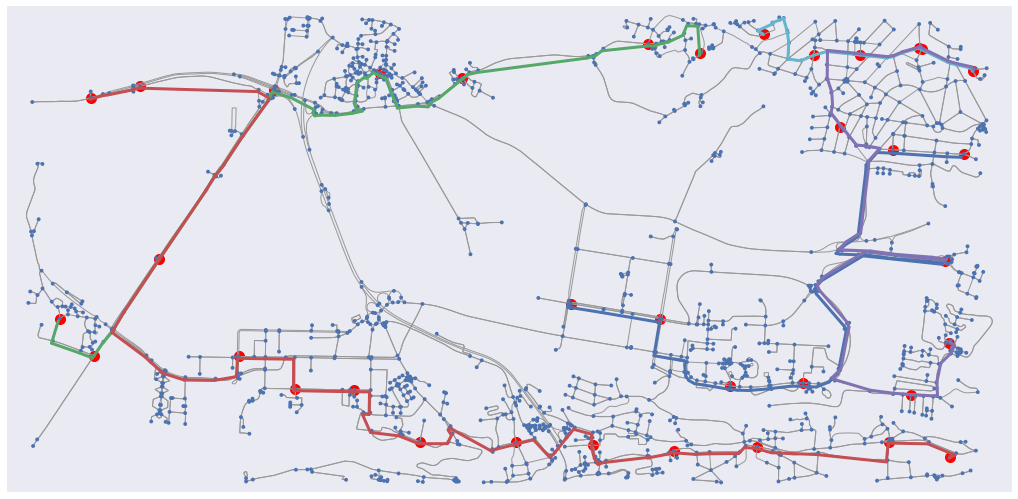

(<Figure size 1296x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa9160d2150>)

In [636]:
fig, ax = plt.subplots(1,1, figsize=(18,10))
ax.scatter([graph.nodes[data]['x'] for data in nearest_indexes], [graph.nodes[data]['y'] for data in nearest_indexes], c='red', s=100, alpha=1)

colors = range(len(path_list))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] * 100
j = -1
for path in path_list:
  j += 1
  epsilon = np.random.standard_normal() / 6000
  # epsilon = 0
  # color = random_color()
  for i in range(len(path) - 1):
    coordi = get_node_coord(graph, path[i])
    coordj = get_node_coord(graph, path[i+1])

    ax.plot([coordi[0]+epsilon, coordj[0]+epsilon], [coordi[1] + epsilon, coordj[1] + epsilon], c=colors[j], alpha=1, linewidth=3)
    

ox.plot_graph(graph, ax=ax, node_color='b')

In [637]:
# def default_k(lat1, lat2, long1, long2, gdf):
#   S =  math.pi/ 180 * (6400 ** 2) * abs(math.sin(lat1) - math.sin(lat2)) * abs(long1 - long2)
#   b = sum(gdf['geometry'].to_crs({'init': 'epsg:3395'}).map(lambda p: p.area / 10**6))
  
#   return int(S * ((b/S) ** (1/6)))

# def get_projections(centers, graph):
#   projections = []
#   edges_ = ox.distance.get_nearest_edges(graph, centers[:, 0], centers[:, 1], method='kdtree')
#   res = [(graph.nodes[edge[0]]['x'], graph.nodes[edge[0]]['y']) for edge in edges_]
#   return res

# def getStops(lat1, lat2, long1, long2):
#   gdf = ox.geometries_from_bbox(lat1, lat2, long1, long2, tags= {'building': True} )
#   type(gdf)

#   df = pd.DataFrame(gdf.geometry)
#   df['area'] = gdf.geometry.area
#   df['centroid_x'] = gdf.geometry.centroid.x
#   df['centroid_y'] = gdf.geometry.centroid.y
#   df[df.area == df.area.max()].geometry

#   k = default_k(lat1, lat2, long1, long2, gdf)
#   X = df[['centroid_x', 'centroid_y']]

#   kmeans = KMeans(n_clusters=k)

#   groups = kmeans.fit_predict(X=X, sample_weight=df['area'])

#   centers = kmeans.cluster_centers_

#   graph = ox.graph_from_bbox(lat1, lat2, long1, long2, network_type='drive_service', simplify=False)

#   projections = get_projections(centers, graph)

#   return projections

# projections = getStops(48.7348, 48.7034, 2.1344, 2.2355)

# nearest_indexes = ox.distance.get_nearest_nodes(graph, projections[:, 0], projections[:, 1], method='kdtree')

# nearest_indexes.sort()
# nearest_indexes = list(np.unique(nearest_indexes))

# def get_node_coord(graph, index):
#   return np.array([graph.nodes[index]['x'], graph.nodes[index]['y']])


# MAX_N_NEIGHBOURS = 10

# edges = {}
# for idx1 in nearest_indexes:
#   edges[idx1] = {}
#   for idx2 in nearest_indexes:
#     edges[idx1][idx2] = (np.inf, [])

# for i in range(len(nearest_indexes) - 1):
#   distances = [
#     (np.linalg.norm(
#         get_node_coord(graph, nearest_indexes[i]) - get_node_coord(graph, nearest_indexes[j])
#     ),
#     j)
#     for j in range(i + 1, len(nearest_indexes))
#   ]
#   distances.sort()
#   distances = distances[:MAX_N_NEIGHBOURS]
#   for (_, j) in distances:
#     try:
#       nodes = ox.distance.shortest_path(graph, nearest_indexes[i], nearest_indexes[j])
#       cost = 0
#       for k in range(len(nodes) - 1):
#         cost += graph.edges[nodes[k], nodes[k+1], 0]['length']
#       edges[nearest_indexes[i]][nearest_indexes[j]] = (cost, nodes)
#       edges[nearest_indexes[j]][nearest_indexes[i]] = (cost, nodes)
#     except nx.NetworkXNoPath:
#       edges[nearest_indexes[i]][nearest_indexes[j]] = (np.inf, [])
#       edges[nearest_indexes[j]][nearest_indexes[i]] = (np.inf, [])

# csgraph = [
#   [edges[nearest_indexes[i]][nearest_indexes[j]][0] for i in range(len(nearest_indexes))] for j in range(len(nearest_indexes)) 
# ]

# span_tree = scipy.sparse.csgraph.minimum_spanning_tree(csgraph)

# span_tree2 = span_tree.copy()

# span_tree = span_tree.toarray()
